## Problem Statement

In [1]:
#Importing Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import traceback
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,PowerTransformer

import imblearn
from imblearn.over_sampling import SMOTE      #Importing Imbalanced liabrary

from sklearn.model_selection import train_test_split  #splittin dataset library

#Importing algorithms liabraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn import svm


#Importing Evaluation Metrics Liabraries
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,roc_auc_score,auc

#Importing statastical test libraries
from scipy.stats import shapiro,normaltest
from scipy import stats
import pickle

#Feature Selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif

#Feature Engineering
from sklearn.feature_selection import SelectFromModel,RFE


## Data Gathering

In [2]:
df_train=pd.read_csv('C:/Users/Admin/Ml_project/data/train.csv')
df_test=pd.read_csv('C:/Users/Admin/Ml_project/data/test.csv')
display(df_train)
display(df_test)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


## Data Analysis

In [3]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None


In [4]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  float64
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  float64
 10  Vintage               127037 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 10.7+ MB


In [5]:
display(df_train.Gender.unique())
display(df_train.Vehicle_Age.unique())
display(df_train.Vehicle_Damage.unique())

display(df_test.Gender.unique())
display(df_test.Vehicle_Age.unique())
display(df_test.Vehicle_Damage.unique())

array(['Male', 'Female'], dtype=object)

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

array(['Yes', 'No'], dtype=object)

array(['Male', 'Female'], dtype=object)

array(['< 1 Year', '1-2 Year', '> 2 Years'], dtype=object)

array(['No', 'Yes'], dtype=object)

In [6]:
df_train.shape,df_test.shape

((381109, 12), (127037, 11))

In [7]:
#checking the null values
display(df_train.isnull().sum())


id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [8]:
df_test.isnull().sum()   #No nan values are present 

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [9]:
df_train['Response'].value_counts()  # Count of 0 is more and count of 1 is less. Imbalanced dataset
                                     # We will balanced it by using SMOTE technique.

0    334399
1     46710
Name: Response, dtype: int64

In [10]:
display(df_train[df_train.duplicated()])    #No duplicates data are available here
display(df_test[df_test.duplicated()])

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage


In [11]:
display(df_train.describe())
display(df_test.describe())

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,30524.643576,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,16945.297103,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,24325.000000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,31642.000000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,39408.000000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,472042.000000,163.000000,299.000000


In [12]:
display(df_train.skew().sort_values(ascending=False))
display(df_test.skew().sort_values(ascending=False))

Response                2.301906e+00
Annual_Premium          1.766087e+00
Age                     6.725390e-01
Previously_Insured      1.677471e-01
Vintage                 3.029517e-03
id                      9.443274e-16
Region_Code            -1.152664e-01
Policy_Sales_Channel   -9.000081e-01
Driving_License        -2.159518e+01
dtype: float64

Annual_Premium           1.077867
Age                      0.673357
Previously_Insured       0.160358
Vintage                  0.001467
id                       0.000000
Region_Code             -0.122291
Policy_Sales_Channel    -0.887642
Driving_License        -23.087563
dtype: float64

## Data Processing

In [13]:
display(df_train.groupby(['Gender','Driving_License'])['id'].count())
display(df_train.groupby(['Vehicle_Age','Response'])['id'].count())
display(df_train.groupby(['Vehicle_Damage','Response'])['id'].count())

display(df_test.groupby(['Gender','Driving_License'])['id'].count())

Gender  Driving_License
Female  0                     212
        1                  174808
Male    0                     600
        1                  205489
Name: id, dtype: int64

Vehicle_Age  Response
1-2 Year     0           165510
             1            34806
< 1 Year     0           157584
             1             7202
> 2 Years    0            11305
             1             4702
Name: id, dtype: int64

Vehicle_Damage  Response
No              0           187714
                1              982
Yes             0           146685
                1            45728
Name: id, dtype: int64

Gender  Driving_License
Female  0                     67
        1                  58734
Male    0                    170
        1                  68066
Name: id, dtype: int64

In [14]:
df_train.drop('id',axis=1,inplace=True)   #Dropping id column
id=df_test['id']
df_test.drop('id',axis=1,inplace=True)

In [15]:
#Replacing categorical value into number
try:
    df_train['Gender']=df_train['Gender'].replace({'Male':1,'Female':0})
    df_train['Vehicle_Damage']=df_train['Vehicle_Damage'].replace({'Yes':1,'No':0})

    df_test['Gender']=df_test['Gender'].replace({'Male':1,'Female':0})
    df_test['Vehicle_Damage']=df_test['Vehicle_Damage'].replace({'Yes':1,'No':0})
except:
    print(traceback.print_exc())


#changing datatype into the integer
try:
    df_train['Region_Code']=df_train['Region_Code'].astype(int)
    df_train['Policy_Sales_Channel']=df_train['Policy_Sales_Channel'].astype(int)

    df_test['Region_Code']=df_test['Region_Code'].astype(int)
    df_test['Policy_Sales_Channel']=df_test['Policy_Sales_Channel'].astype(int)
except:
    print(traceback.print_exc())

In [16]:
display(df_train.head())
display(df_test.head())

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,> 2 Years,1,40454.0,26,217,1
1,1,76,1,3,0,1-2 Year,0,33536.0,26,183,0
2,1,47,1,28,0,> 2 Years,1,38294.0,26,27,1
3,1,21,1,11,1,< 1 Year,0,28619.0,152,203,0
4,0,29,1,41,1,< 1 Year,0,27496.0,152,39,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11,1,< 1 Year,0,35786.0,152,53
1,1,40,1,28,0,1-2 Year,1,33762.0,7,111
2,1,47,1,28,0,1-2 Year,1,40050.0,124,199
3,1,24,1,27,1,< 1 Year,1,37356.0,152,187
4,1,27,1,28,1,< 1 Year,0,59097.0,152,297


### Ordinal_Encoding

In [17]:
ordinal_enco=OrdinalEncoder()         #Replacing column value by Ordinal Encoding because data is in order fromat in input variable 
df_train['Vehicle_Age']=ordinal_enco.fit_transform(df_train[['Vehicle_Age']])
df_test['Vehicle_Age']=ordinal_enco.fit_transform(df_test[['Vehicle_Age']])


df_train['Vehicle_Age']=df_train['Vehicle_Age'].astype(int)
df_test['Vehicle_Age']=df_test['Vehicle_Age'].astype(int)

In [18]:
display(df_train.head())
display(df_test.head())

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28,0,2,1,40454.0,26,217,1
1,1,76,1,3,0,0,0,33536.0,26,183,0
2,1,47,1,28,0,2,1,38294.0,26,27,1
3,1,21,1,11,1,1,0,28619.0,152,203,0
4,0,29,1,41,1,1,0,27496.0,152,39,0


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25,1,11,1,1,0,35786.0,152,53
1,1,40,1,28,0,0,1,33762.0,7,111
2,1,47,1,28,0,0,1,40050.0,124,199
3,1,24,1,27,1,1,1,37356.0,152,187
4,1,27,1,28,1,1,0,59097.0,152,297


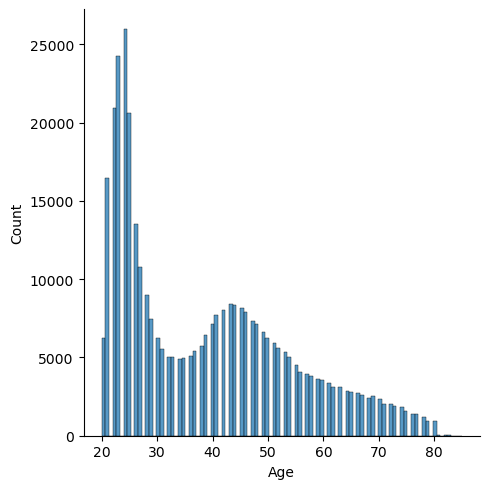

In [19]:
print(sns.displot(df_train['Age']))

Axes(0.125,0.11;0.775x0.77)


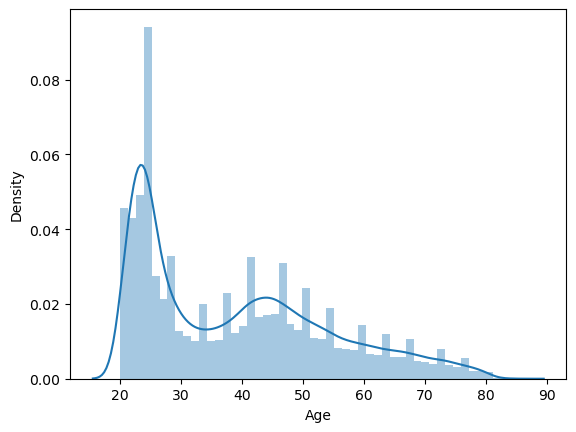

In [20]:
print(sns.distplot(df_test['Age']))

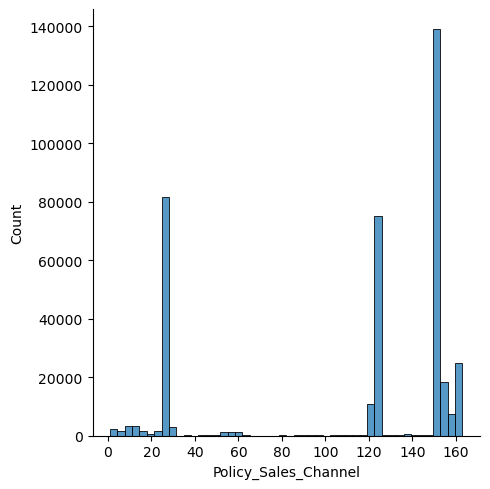

In [21]:
display(sns.displot(df_train['Policy_Sales_Channel']))

Axes(0.125,0.11;0.775x0.77)


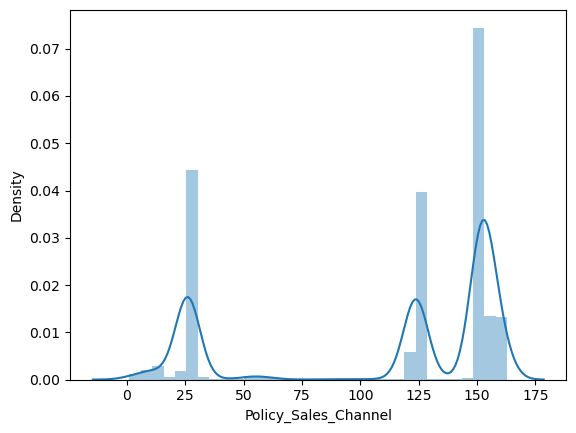

In [22]:
print(sns.distplot(df_test['Policy_Sales_Channel']))

<Axes: xlabel='Region_Code', ylabel='Density'>

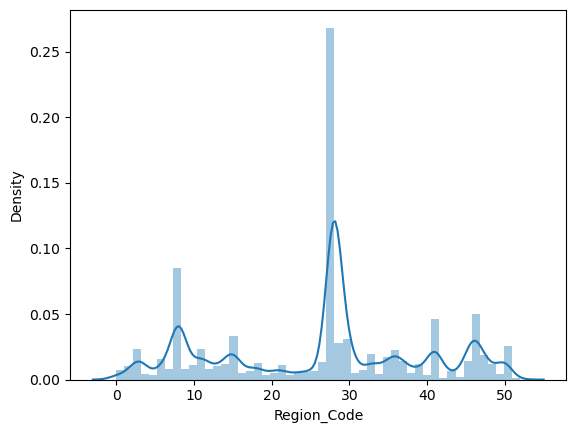

In [23]:
sns.distplot(df_train['Region_Code'])

<Axes: xlabel='Region_Code', ylabel='Density'>

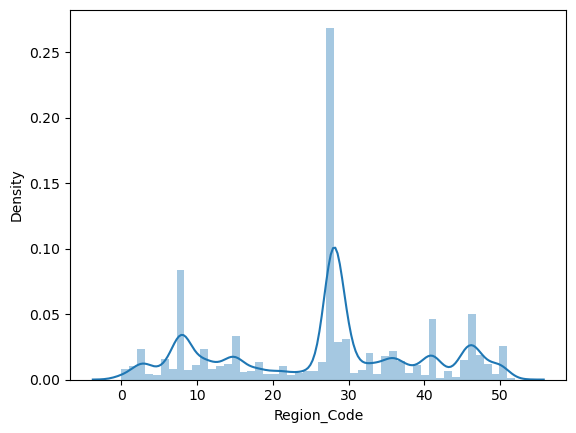

In [24]:
sns.distplot(df_test['Region_Code'])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

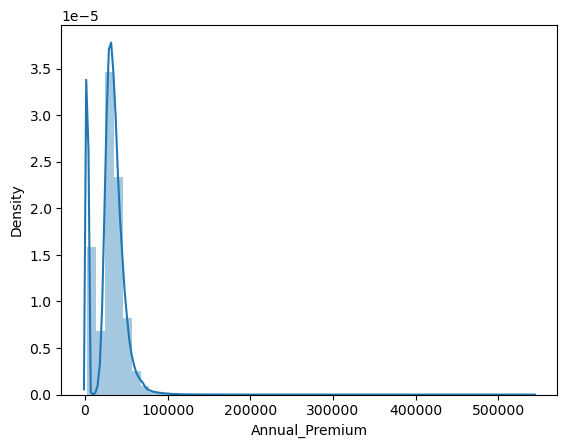

In [25]:
sns.distplot(df_train['Annual_Premium'])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

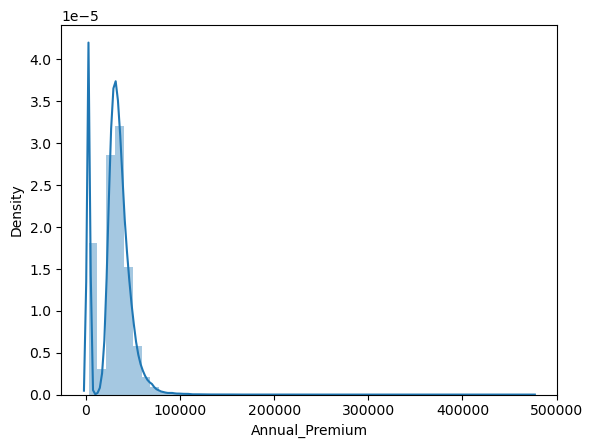

In [26]:
sns.distplot(df_test['Annual_Premium'])

<Axes: xlabel='Vintage', ylabel='Density'>

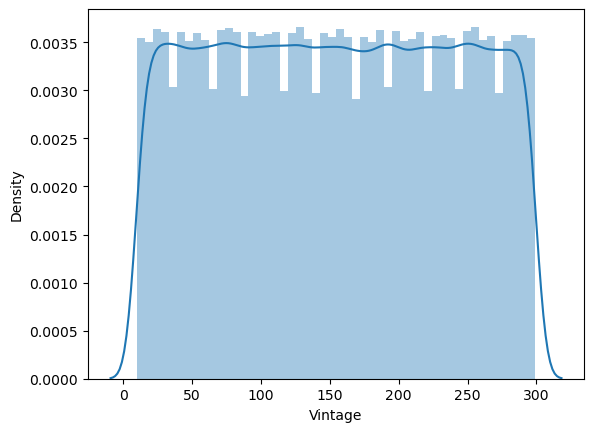

In [27]:
sns.distplot(df_train['Vintage'])

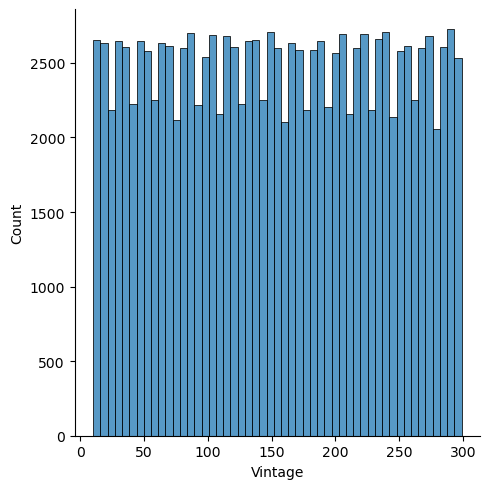

In [28]:
sns.displot(df_test['Vintage'])

<Axes: xlabel='Previously_Insured', ylabel='count'>

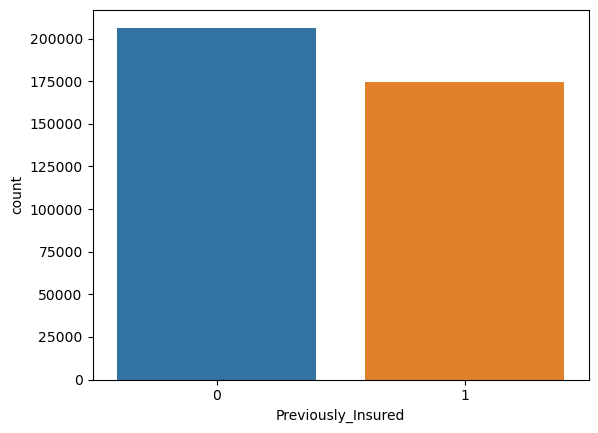

In [29]:
sns.countplot(x='Previously_Insured',data=df_train)

<Axes: xlabel='Driving_License', ylabel='count'>

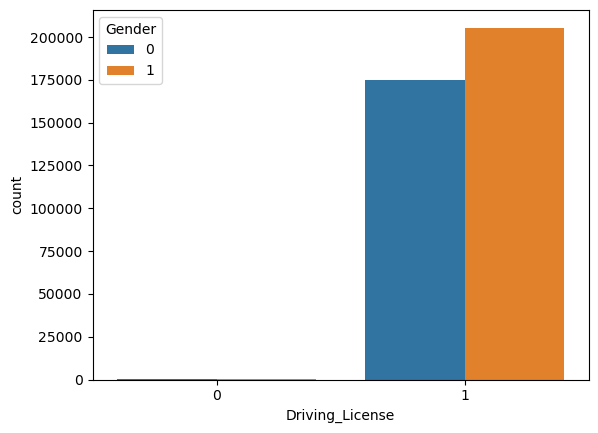

In [30]:
sns.countplot(x='Driving_License',hue='Gender',data=df_train)

<Axes: xlabel='Response', ylabel='count'>

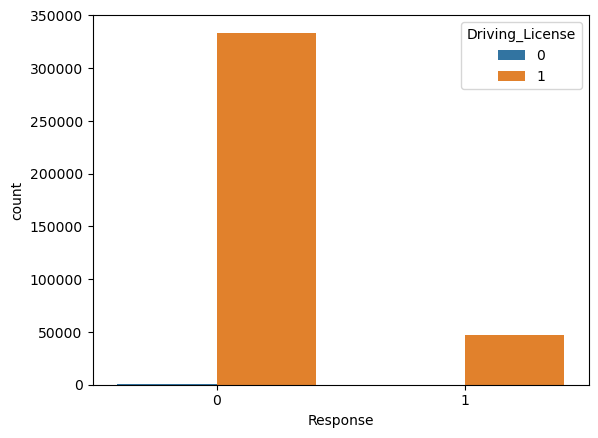

In [31]:
sns.countplot(x='Response',hue='Driving_License',data=df_train)

<Axes: >

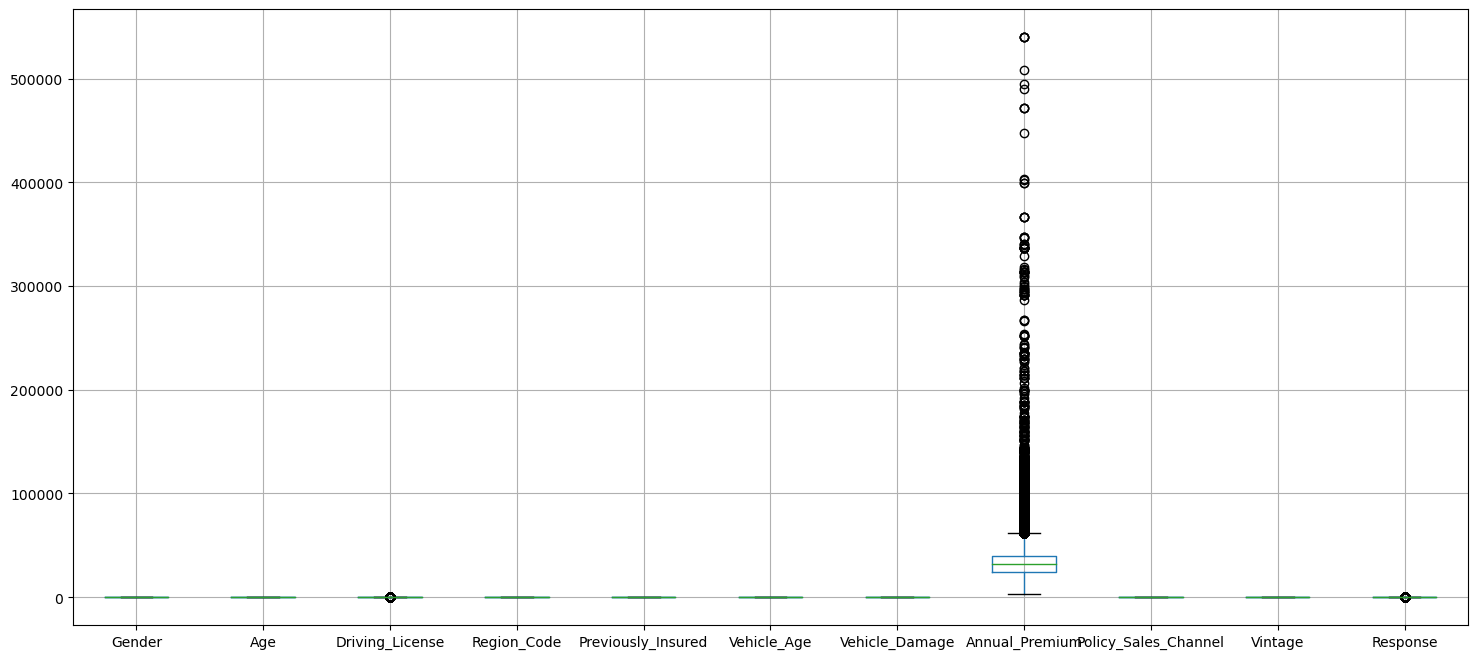

In [32]:
plt.figure(figsize=(18,8))   #Detecting an Outliers
df_train.boxplot()

<Axes: >

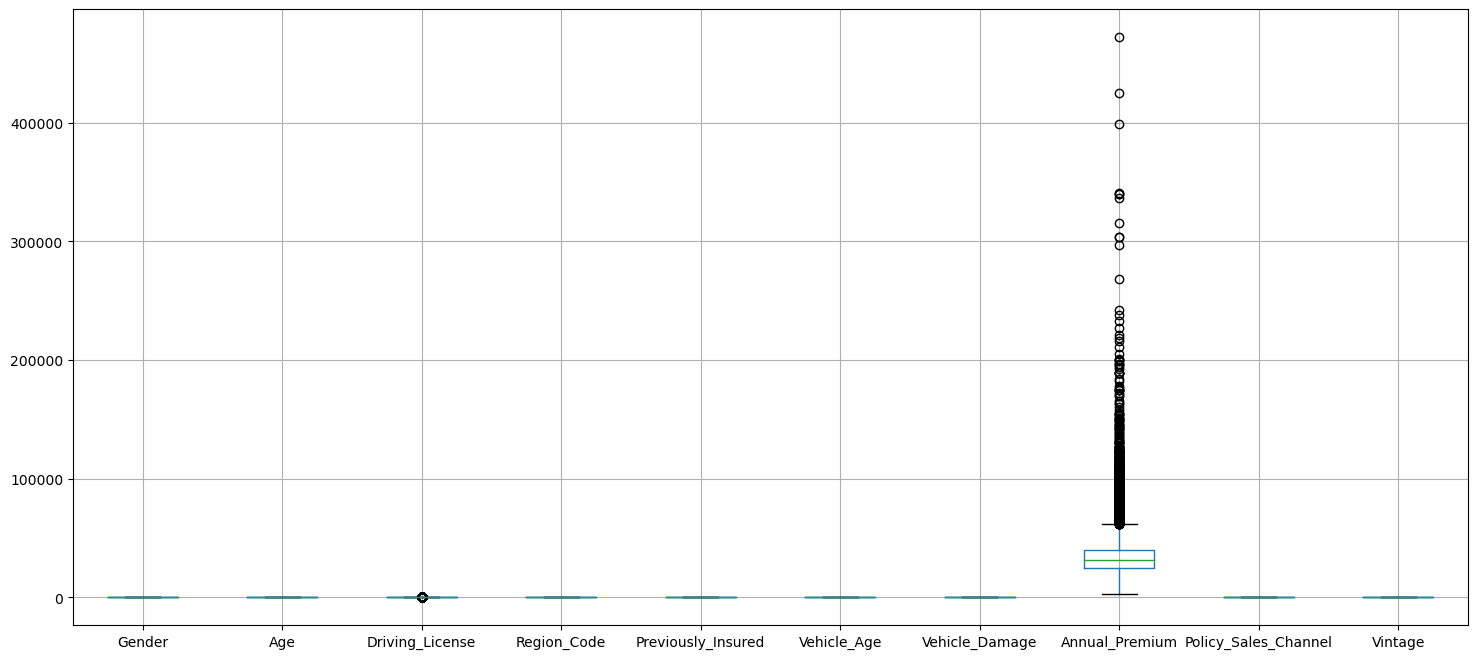

In [33]:
plt.figure(figsize=(18,8))   #Detecting an Outliers
df_test.boxplot()

## IQR

In [34]:
df_train['Annual_Premium']

np.median(df_train['Annual_Premium'])

Q1=np.quantile(df_train['Annual_Premium'],0.25)
Q3=np.quantile(df_train['Annual_Premium'],0.75)
print(Q1,Q3)
IQR=Q3-Q1
print('IQR is',IQR)
upper_bound=Q3+IQR*1.5
lower_bound=Q1-IQR*1.5
print('upper_bound is',upper_bound)
print('lower_bound is',lower_bound)

detected_outliers=[i for i in df_train['Annual_Premium'] if i<lower_bound or i>upper_bound]
len(detected_outliers)

24405.0 39400.0
IQR is 14995.0
upper_bound is 61892.5
lower_bound is 1912.5


10320

In [35]:
df_test['Annual_Premium']

np.median(df_test['Annual_Premium'])

Q1=np.quantile(df_test['Annual_Premium'],0.25)
Q3=np.quantile(df_test['Annual_Premium'],0.75)
print(Q1,Q3)
IQR=Q3-Q1
print('IQR is',IQR)
upper_bound=Q3+IQR*1.5
lower_bound=Q1-IQR*1.5
print('upper_bound is',upper_bound)
print('lower_bound is',lower_bound)

detected_outliers=[i for i in df_test['Annual_Premium'] if i<lower_bound or i>upper_bound]
len(detected_outliers)

24325.0 39408.0
IQR is 15083.0
upper_bound is 62032.5
lower_bound is 1700.5


3370

In [36]:
pt=PowerTransformer()
df_train[['Age','Annual_Premium','Policy_Sales_Channel']]=pt.fit_transform(df_train[['Age','Annual_Premium','Policy_Sales_Channel']])

df_test[['Age','Annual_Premium','Policy_Sales_Channel']]=pt.fit_transform(df_test[['Age','Annual_Premium','Policy_Sales_Channel']])


In [37]:
print(pt.lambdas_)
print(df_train[['Age','Annual_Premium','Policy_Sales_Channel']].skew())

[-0.3859311   0.79086416  1.46620211]
Age                     0.065385
Annual_Premium          0.083221
Policy_Sales_Channel   -0.795323
dtype: float64


In [38]:
print(pt.lambdas_)
print(df_test[['Age','Annual_Premium','Policy_Sales_Channel']].skew())

[-0.3859311   0.79086416  1.46620211]
Age                     0.065657
Annual_Premium         -0.012693
Policy_Sales_Channel   -0.788351
dtype: float64


<Axes: xlabel='Age', ylabel='Density'>

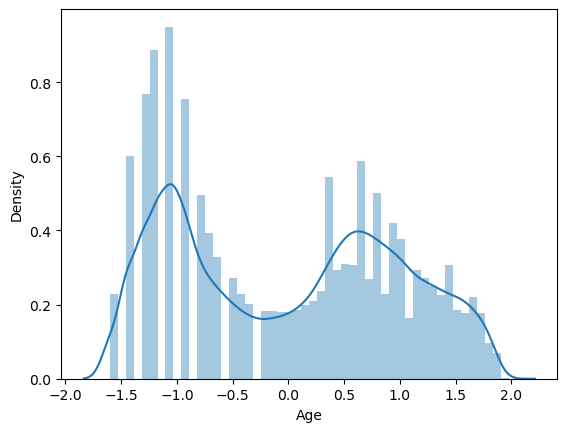

In [39]:
sns.distplot(df_train['Age'])

<Axes: xlabel='Annual_Premium', ylabel='Density'>

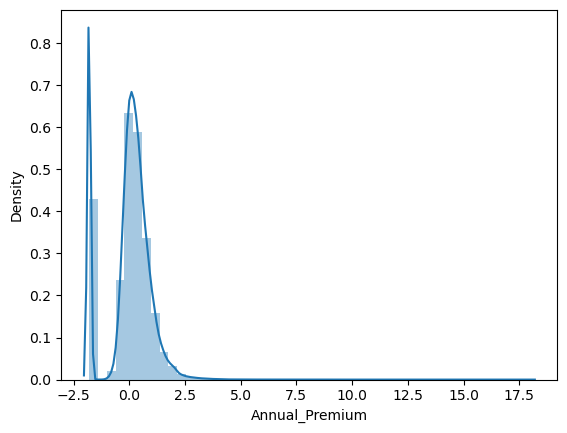

In [40]:
sns.distplot(df_train['Annual_Premium'])

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

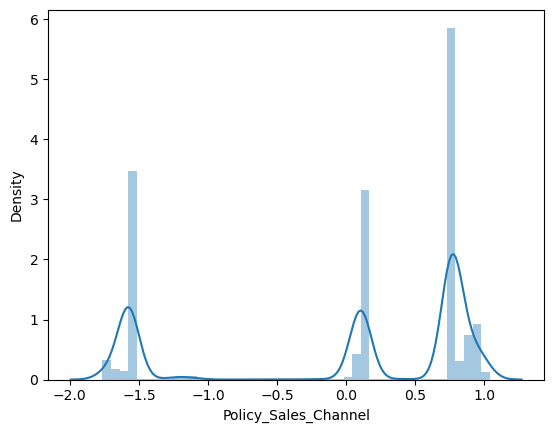

In [41]:
sns.distplot(df_train['Policy_Sales_Channel'])

In [42]:
df_train.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,3.811090e+05,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,3.811090e+05,3.811090e+05,381109.000000,381109.000000
mean,0.540761,1.010235e-15,0.997869,26.388807,0.458210,0.516388,0.504877,-7.608050e-16,3.497845e-16,154.347397,0.122563
std,0.498336,1.000001e+00,0.046110,13.229888,0.498251,0.577698,0.499977,1.000001e+00,1.000001e+00,83.671304,0.327936
min,0.000000,-1.604540e+00,0.000000,0.000000,0.000000,0.000000,0.000000,-1.804717e+00,-1.764282e+00,10.000000,0.000000
25%,0.000000,-9.291781e-01,1.000000,15.000000,0.000000,0.000000,0.000000,-2.732248e-01,-1.542217e+00,82.000000,0.000000
50%,1.000000,7.211084e-02,1.000000,28.000000,0.000000,0.000000,1.000000,1.404557e-01,3.141093e-01,154.000000,0.000000
75%,1.000000,8.257192e-01,1.000000,35.000000,1.000000,1.000000,1.000000,5.569742e-01,7.667938e-01,227.000000,0.000000
max,1.000000,1.981703e+00,1.000000,52.000000,1.000000,2.000000,1.000000,1.796888e+01,1.041815e+00,299.000000,1.000000


In [43]:
df_train.skew().sort_values(ascending=False)

Response                 2.301906
Vehicle_Age              0.589682
Previously_Insured       0.167747
Annual_Premium           0.083221
Age                      0.065385
Vintage                  0.003030
Vehicle_Damage          -0.019507
Region_Code             -0.115266
Gender                  -0.163590
Policy_Sales_Channel    -0.795323
Driving_License        -21.595182
dtype: float64

In [44]:
df_test.skew().sort_values(ascending=False)

Vehicle_Age              0.586707
Previously_Insured       0.160358
Age                      0.065657
Vintage                  0.001467
Vehicle_Damage          -0.009966
Annual_Premium          -0.012693
Region_Code             -0.122291
Gender                  -0.148953
Policy_Sales_Channel    -0.788351
Driving_License        -23.087563
dtype: float64

### ANNOVA Test

In [45]:
annova,p_value = f_classif(df_train.iloc[:,:-1].to_numpy(),df_train['Response'])
dataframe = pd.DataFrame({'Annova_value':annova,'P_value':p_value},index=df_train.iloc[:,:-1].columns)
dataframe

,Annova_value,P_value
Gender,1050.913073,3.180742e-230
Age,8855.217403,0.000000e+00
Driving_License,39.306693,3.625834e-10
Region_Code,42.582736,6.783917e-11
Previously_Insured,50203.354009,0.000000e+00
Vehicle_Age,4173.484592,0.000000e+00
Vehicle_Damage,54742.245365,0.000000e+00
Annual_Premium,130.991636,2.515088e-30
Policy_Sales_Channel,8311.280388,0.000000e+00
Vintage,0.420469,5.167037e-01


In [46]:
dataframe.loc[dataframe['P_value']>0.05]

,Annova_value,P_value
Vintage,0.420469,0.516704


#### Chi-Square Test

In [47]:
chi_sqr,p_value = chi2(df_train.iloc[:,[0,2,4,5,6]].to_numpy(),df_train['Response'])
dataframe1 = pd.DataFrame({'chi_sqr':chi_sqr,'P_value':p_value},index=df_train.iloc[:,[0,2,4,5,6]].columns)
dataframe1

,chi_sqr,P_value
Gender,481.295296,1.116583e-106
Driving_License,0.083740,7.722922e-01
Previously_Insured,24033.827713,0.000000e+00
Vehicle_Age,2668.057145,0.000000e+00
Vehicle_Damage,23700.035830,0.000000e+00


In [48]:
dataframe1.loc[dataframe1['P_value']>0.05]

,chi_sqr,P_value
Driving_License,0.08374,0.772292


In [49]:
## I won't be used distance based algorithm, so that's why Feature scaling not required.

## SMOTE (Creating an Instance of the SMOTE)

In [50]:
x=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [51]:
print(x.shape)
print(y.value_counts())

(668798, 10)
1    334399
0    334399
Name: Response, dtype: int64


## Splitting the data

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=4,stratify=y)
print(x_train.columns)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')
(167200, 10)
(501598,)
(167200,)


## Model Building

### Creating an instance of Logistic Regression

In [53]:
Train_accuracy=[]
Test_accuracy=[]
log_reg=LogisticRegression(n_jobs=-1)
log_model=log_reg.fit(x_train,y_train)
y_train_pred=log_model.predict(x_train)
y_pred=log_model.predict(x_test)
Train_accuracy.append(accuracy_score(y_train,y_train_pred))
Test_accuracy.append(accuracy_score(y_test,y_pred))

display(Train_accuracy)
display(Test_accuracy)

[0.7810358095526697]

[0.7804007177033493]

#### Confusion Matrix

In [54]:
print(confusion_matrix(y_test,y_pred))

[[50136 33464]
 [ 3253 80347]]


In [55]:
print('Training_Accuracy',classification_report(y_train,y_train_pred))
print('Testing_Accuracy',classification_report(y_test,y_pred))

Training_Accuracy               precision    recall  f1-score   support

           0       0.94      0.60      0.73    250799
           1       0.71      0.96      0.81    250799

    accuracy                           0.78    501598
   macro avg       0.82      0.78      0.77    501598
weighted avg       0.82      0.78      0.77    501598

Testing_Accuracy               precision    recall  f1-score   support

           0       0.94      0.60      0.73     83600
           1       0.71      0.96      0.81     83600

    accuracy                           0.78    167200
   macro avg       0.82      0.78      0.77    167200
weighted avg       0.82      0.78      0.77    167200



In [56]:
print('f1_score for train',f1_score(y_train,y_train_pred))
print('f1_score for test',f1_score(y_test,y_pred))

f1_score for train 0.8144623170925357
f1_score for test 0.8140073248197922


## Creating an instance for XGBoosting 

In [59]:
xgb_model=xgb.XGBClassifier(n_jobs=-1)
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [60]:
y_train_xgb=xgb_model.predict(x_train)
y_pred_xgb=xgb_model.predict(x_test)

In [61]:
print(confusion_matrix(y_test,y_pred_xgb))

[[80433  3167]
 [10957 72643]]


In [62]:
print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92     83600
           1       0.96      0.87      0.91     83600

    accuracy                           0.92    167200
   macro avg       0.92      0.92      0.92    167200
weighted avg       0.92      0.92      0.92    167200



In [63]:
print('Train_accuracy',accuracy_score(y_train,y_train_xgb))
print('Test_accuracy',accuracy_score(y_test,y_pred_xgb))

Train_accuracy 0.9182173772622698
Test_accuracy 0.9155263157894736


In [64]:
print('f1_score for train',f1_score(y_train,y_train_xgb))
print('f1_score for test',f1_score(y_test,y_pred_xgb))

f1_score for train 0.914097967935939
f1_score for test 0.911398281161784


0.7804007177033494
0.9155263157894737


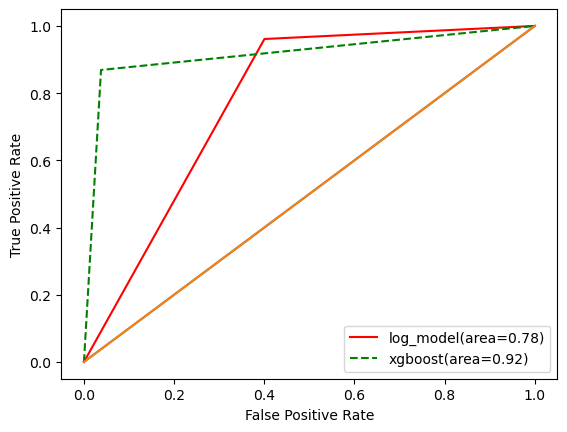

In [65]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)                            #for logistic regressio
#fpr_rf,tpr_rf,thresholds_rf=roc_curve(y_test,rf_rscv_y_pred)              #for random forest
fpr_xg,tpr_xg,thresholds_xg=roc_curve(y_test,y_pred_xgb)                   #for xgboost
auc_logistic=auc(fpr,tpr)
print(auc_logistic)
#auc_rf=auc(fpr_rf,tpr_rf)
#print(auc_rf)
auc_xgb=auc(fpr_xg,tpr_xg)
print(auc_xgb)
plt.plot(fpr,tpr,color='red',linestyle='-',label='log_model(area=%0.2f)'%auc_logistic)
#plt.plot(fpr_rf,tpr_rf,color='orange',linestyle='-',label='rf_model(area=%0.2f)'%auc_rf)
plt.plot(fpr_xg,tpr_xg,color='green',linestyle='--',label='xgboost(area=%0.2f)'%auc_xgb)
plt.plot([0,1],[0,1])
#plt.plot([0,1],[0,1])
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [66]:
x_final=df_test.iloc[:,:]
y_final=xgb_model.predict(x_final)

In [67]:
id.shape,y_final.shape   #test id column and predicted output id column should be equal

((127037,), (127037,))

In [68]:
#Creating DataFrame
final=pd.DataFrame({'id':id,'Response':y_final})
final

,id,Response
0,381110,0
1,381111,1
2,381112,1
3,381113,1
4,381114,0
...,...,...
127032,508142,0
127033,508143,1
127034,508144,0
127035,508145,0
